# Fake News detection Classification

The dataset is prepared by KUMAR RANJAN KAMILA

Here is the dataset link : https://www.kaggle.com/kumarranjankamila/fake-news-detection-dataset

1 - Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer
import string

Using TensorFlow backend.


2 - Load data

In [2]:
news_df = pd.read_csv('files/news.csv')

3 - Show how many rows and columns there are in dataframe

In [3]:
row_count = news_df.shape[0]
column_count = news_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 6335 , Column : 4


4 - Show first 5 values of dataframe

In [4]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


5 - Show last 5 values of dataframe

In [5]:
news_df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


6 - Show each column information of dataframe

In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


7 - Show how many variables there are in dataframe

In [7]:
news_df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

8 - Show descriptive statistics of dataframe

In [8]:
news_df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


9 - Determine if null values of each column are in a dataframe

In [9]:
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

10 - Show number of fake(0) and real(1) news

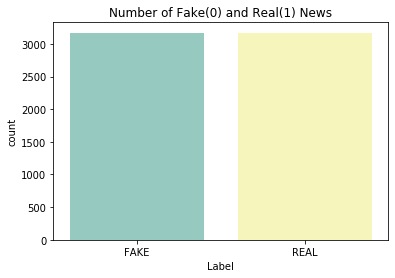

In [10]:
sns.countplot(x="label", data = news_df,palette="Set3")
plt.xlabel('Label')
plt.title('Number of Fake(0) and Real(1) News')
plt.show();

11 - Removing punctuations, the useless words except for stop words

In [11]:
ps = PorterStemmer #  Lemmatization.
lmr = WordNetLemmatizer
corpus = []
for i in range( 0, len(news_df)):
    review = re.sub('[^a-zA-Z]', ' ', news_df['text'][i]) # Cleaning all special characters and numbers, keeping words only
    review = review.lower() # Making all the words to lower case.
    review = review.split()
    
    review = [lmr.lemmatize('word',word) for word in review if word not in set(stopwords.words('english'))]
    # This is list compreshession adding the words which are not avaibale in stopwords.
    review = ' '.join(review)
    corpus.append(review) # adding all words to Corpus

12 - Convert the text into a matrix of token counts

In [12]:
cv = CountVectorizer(max_features=10000) # Taking the 10000 important words.
X = cv.fit_transform(corpus).toarray() # Fitting the model to Corpus and converting it to array.

12 - Define Y value based on label

In [13]:
Y = news_df.iloc[:,3].values

14 - Learn the shape of X and Y

In [14]:
X.shape

(6335, 10000)

In [15]:
Y.shape

(6335,)

15 - Spliting Data into train and test

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.2,random_state = 5)

# Multinomial Naive Bayes Classification

16 - Train Model

In [17]:
model = MultinomialNB()
label_detection_model = model.fit(X_train,Y_train)

17 - The predicted output of our model

In [18]:
Y_pred = label_detection_model.predict(X_test)

18 - Show predictions

In [19]:
Y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

19 - Show actual values

In [20]:
Y_train

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [21]:
Y_test.shape

(1267,)

In [22]:
Y_pred.shape

(1267,)

20 - Evaluate the model by showing report, confusion matrix & accuracy score ( X_train , Y_train)

In [23]:
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_mnb = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_mnb)

              precision    recall  f1-score   support

        FAKE       0.88      0.87      0.88       637
        REAL       0.87      0.88      0.88       630

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267

Confusion Matrix: 
 [[557  80]
 [ 75 555]]
Accuracy:  0.877663772691397


22 - Define a Method to draw confusion_matrix

In [25]:
def plot_confusion_matrix(conf_matrix,true_y,accuracy_score, title= "", figsize=(8,6), image_path = ""):

    # conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_df, cmap="Blues", fmt='', annot=labels)
    plt.savefig(image_path, bbox_inches = "tight")
    plt.tight_layout()
    plt.show();
    print('Accuracy: ', accuracy_score)

24 - Draw a HeatMap related with confusion_matrix

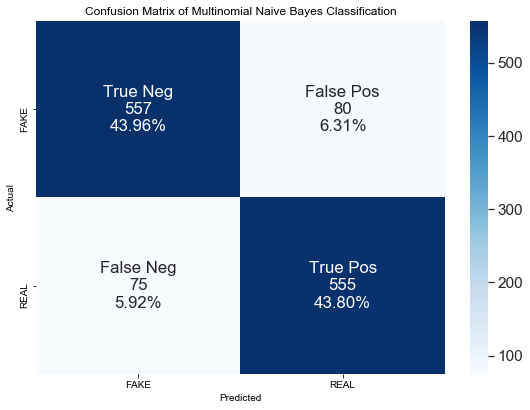

Accuracy:  0.877663772691397


In [27]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_mnb,
                      title="Confusion Matrix of Multinomial Naive Bayes Classification",image_path = 'images/image1.png')

# Logistic Regression Classification

25 - Implement Logistic Regression Classification

In [28]:
model = LogisticRegression(max_iter=1000)
label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_lg = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_lg)

              precision    recall  f1-score   support

        FAKE       0.91      0.93      0.92       637
        REAL       0.93      0.91      0.92       630

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix: 
 [[591  46]
 [ 59 571]]
Accuracy:  0.9171270718232044


26 - Draw a HeatMap related with confusion_matrix

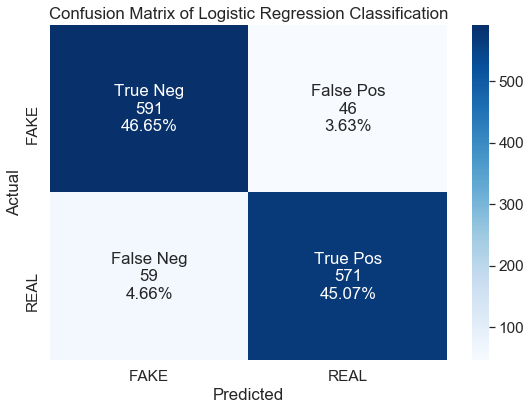

Accuracy:  0.9171270718232044


In [29]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_lg,
                      title="Confusion Matrix of Logistic Regression Classification",image_path = 'images/image2.png')

# Random Forest Classification

27 - Implement Random Forest Classification

In [30]:
model = RandomForestClassifier(n_estimators=100)
label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_rf = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_rf)

              precision    recall  f1-score   support

        FAKE       0.92      0.90      0.91       637
        REAL       0.90      0.92      0.91       630

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix: 
 [[576  61]
 [ 51 579]]
Accuracy:  0.9116022099447514


28 - Draw a HeatMap related with confusion_matrix

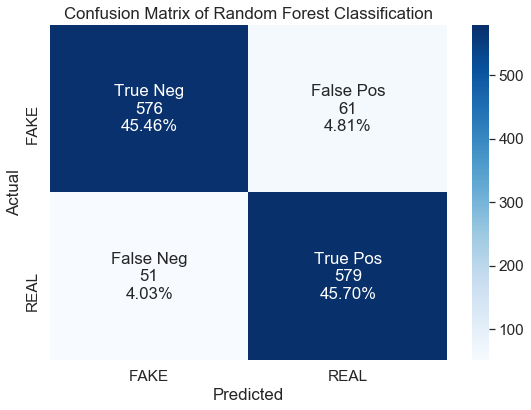

Accuracy:  0.9116022099447514


In [31]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_rf,
                      title="Confusion Matrix of Random Forest Classification",image_path = 'images/image3.png')

# Decision Tree Classification

29 - Implement Decision Tree Classification

In [32]:
model = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020)

label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_dt = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_dt)

              precision    recall  f1-score   support

        FAKE       0.76      0.85      0.80       637
        REAL       0.83      0.73      0.78       630

    accuracy                           0.79      1267
   macro avg       0.80      0.79      0.79      1267
weighted avg       0.80      0.79      0.79      1267

Confusion Matrix: 
 [[542  95]
 [169 461]]
Accuracy:  0.7916337805840569


30 - Draw a HeatMap related with confusion_matrix

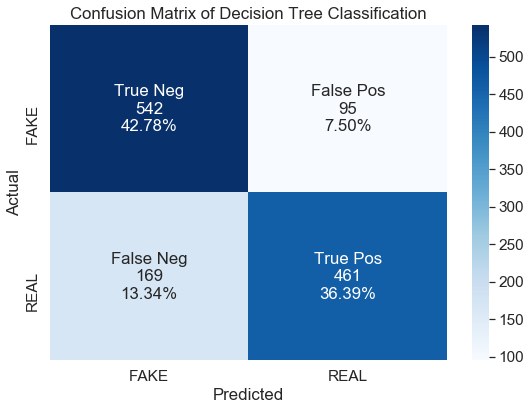

Accuracy:  0.7916337805840569


In [33]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_dt,
                      title="Confusion Matrix of Decision Tree Classification",image_path = 'images/image4.png')

# KNN Classification

31 - Implement KNN Classification

In [34]:
model = KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')
label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_knn = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_knn)

              precision    recall  f1-score   support

        FAKE       0.81      0.81      0.81       637
        REAL       0.80      0.80      0.80       630

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267

Confusion Matrix: 
 [[513 124]
 [124 506]]
Accuracy:  0.8042620363062352


32 - Draw a HeatMap related with confusion_matrix

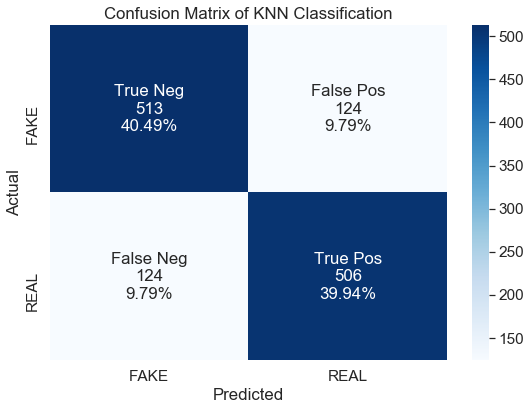

Accuracy:  0.8042620363062352


In [35]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_knn,
                      title="Confusion Matrix of KNN Classification",image_path = 'images/image5.png')

# XGBoost Classification

33 - Implement XGBoost Classification

In [36]:
model = XGBClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5,random_state=2020)
label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_xgboost = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_xgboost)

              precision    recall  f1-score   support

        FAKE       0.77      0.87      0.81       637
        REAL       0.85      0.73      0.78       630

    accuracy                           0.80      1267
   macro avg       0.81      0.80      0.80      1267
weighted avg       0.81      0.80      0.80      1267

Confusion Matrix: 
 [[553  84]
 [169 461]]
Accuracy:  0.8003157063930545


34 - Draw a HeatMap related with confusion_matrix

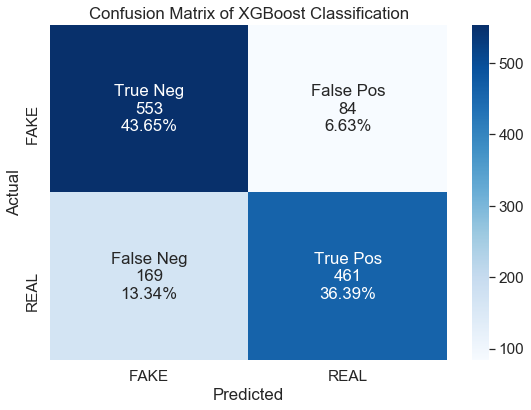

Accuracy:  0.8003157063930545


In [37]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_xgboost,
                      title="Confusion Matrix of XGBoost Classification",image_path = 'images/image6.png')

# Support Vector Classification

35 - Implement Support Vector Classification

In [38]:
model = LinearSVC(max_iter=1200000)
label_detection_model = model.fit(X_train,Y_train)
Y_pred = label_detection_model.predict(X_test)
print(classification_report(Y_test ,Y_pred))
y_train_pred_matrix = confusion_matrix(Y_test,Y_pred)
acc_scr_svc = accuracy_score(Y_test,Y_pred)
print('Confusion Matrix: \n',y_train_pred_matrix)
print('Accuracy: ', acc_scr_svc)

              precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89       637
        REAL       0.90      0.88      0.89       630

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267

Confusion Matrix: 
 [[573  64]
 [ 76 554]]
Accuracy:  0.8895027624309392


36 - Draw a HeatMap related with confusion_matrix

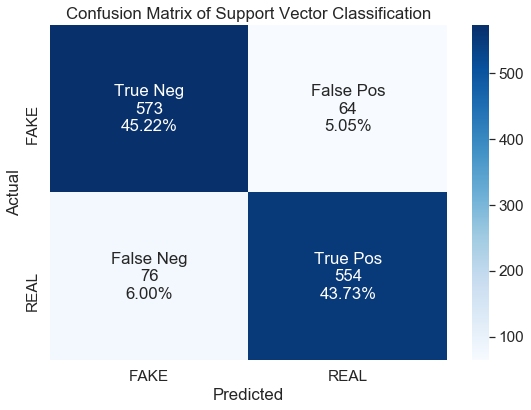

Accuracy:  0.8895027624309392


In [39]:
plot_confusion_matrix(y_train_pred_matrix,
                      Y_test,
                      acc_scr_svc,
                      title="Confusion Matrix of Support Vector Classification",image_path = 'images/image7.png')

37 - Create Dataframe based on Accurancy results of each classifier

In [48]:
data = [
        ['Multinomial Naive Bayes', acc_scr_mnb], 
        ['Logistic Regression', acc_scr_lg], 
        ['Random Forest', acc_scr_rf],
        ['Decision Tree', acc_scr_dt],
        ['KNN', acc_scr_knn],
        ['XGBoost', acc_scr_xgboost],
        ['SVC', acc_scr_svc]
       ] 

df = pd.DataFrame(data, columns = ['Classification_Name', 'Accurancy_Score']) 

In [49]:
df

,Classification_Name,Accurancy_Score
0,Multinomial Naive Bayes,0.877664
1,Logistic Regression,0.917127
2,Random Forest,0.911602
3,Decision Tree,0.791634
4,KNN,0.804262
5,XGBoost,0.800316
6,SVC,0.889503


In [50]:
df["Accurancy_Score"] = df["Accurancy_Score"].map('{:,.3f}'.format)

In [51]:
df

,Classification_Name,Accurancy_Score
0,Multinomial Naive Bayes,0.878
1,Logistic Regression,0.917
2,Random Forest,0.912
3,Decision Tree,0.792
4,KNN,0.804
5,XGBoost,0.800
6,SVC,0.890


In [52]:
df = df.sort_values(by = 'Accurancy_Score', ascending=False)

In [53]:
df['Accurancy_Score'] = df['Accurancy_Score'].astype(float)

In [54]:
df.loc[:, 'Accurancy_Score'] = df['Accurancy_Score'] * 100

In [55]:
df

,Classification_Name,Accurancy_Score
1,Logistic Regression,91.7
2,Random Forest,91.2
6,SVC,89.0
0,Multinomial Naive Bayes,87.8
4,KNN,80.4
5,XGBoost,80.0
3,Decision Tree,79.2


38 - Draw a Figure to show acurancy results ordered by descending

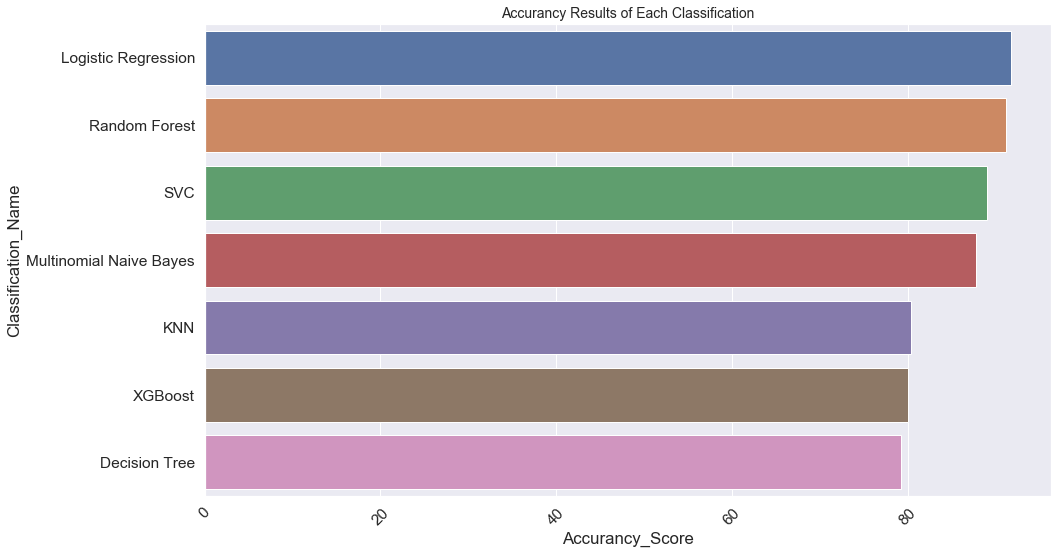

In [56]:
plt.figure(figsize=(15,8))

sns.barplot(data = df, 
            x = "Accurancy_Score" , 
            y = 'Classification_Name')
plt.title("Accurancy Results of Each Classification", fontsize = 14)
plt.xticks(rotation=45)
plt.savefig('images/image8.png', bbox_inches = "tight")
plt.tight_layout()
plt.show();